# ARCH and GARCH

In [32]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import yfinance as yf
from datetime import datetime, timedelta

# Volatility
Measure of deviation, in the context of returns. Measure of fluctuations.

In [68]:
end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)
data = yf.download("AAPL", start=start_date, end=end_date, auto_adjust=False)
data.columns = data.columns.droplevel('Ticker')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-06,190.520737,192.320007,194.759995,192.110001,194.449997,41089700
2023-12-07,192.452469,194.270004,195.000000,193.589996,193.630005,47477700
2023-12-08,193.879028,195.710007,195.990005,193.669998,194.199997,53406400
2023-12-11,191.372665,193.179993,193.490005,191.419998,193.110001,60943700
2023-12-12,192.888382,194.710007,194.720001,191.720001,193.080002,52696900


### Log Returns
Used metric in finance to measure the percentage change in the price of an asset over an specific period. 

They are calculated using the natural logarithm of the ratio of the current price to the previous price:

$$
R_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

Properties and advantages:
- Additivity: log-returns of different time periods and assets ca be easily added together, allowing for straightforward aggregation and comparison.
- Approximation of percentage changes: log-returns approximate percengage changes in asset prices, making them a more natural measure for financial analysis than simple returns.
- Stationarity: log-returns often exhibit stationary behavior, meaning their statistical properties such as mean and variance remain relativelty constant over time. This property is valuable for modeling and forecasting.
- Symmetry: log-returns are symmetric around zero, which simplifies statistical analysis and facilitates interpretation.

In [69]:
# calculate log returns
data['lag_adj_close'] = data['Adj Close'].shift(1)
data['log_returns'] = np.log(data['Adj Close']/data['lag_adj_close'])
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,lag_adj_close,log_returns
Date,,,,,,,,
2023-12-06,190.520737,192.320007,194.759995,192.110001,194.449997,41089700,NaN,NaN
2023-12-07,192.452469,194.270004,195.000000,193.589996,193.630005,47477700,190.520737,0.010088
2023-12-08,193.879028,195.710007,195.990005,193.669998,194.199997,53406400,192.452469,0.007385
2023-12-11,191.372665,193.179993,193.490005,191.419998,193.110001,60943700,193.879028,-0.013012
2023-12-12,192.888382,194.710007,194.720001,191.720001,193.080002,52696900,191.372665,0.007889


Histogram of frequencies will show how the returns are distributed to have an idea of its statistical form:

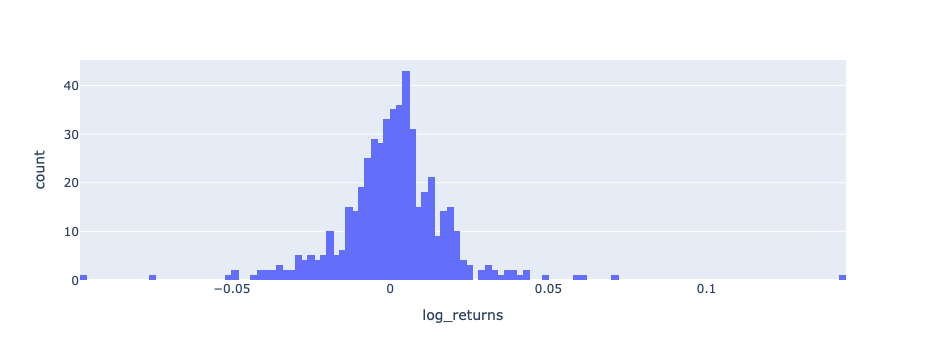

In [70]:
fig = px.histogram(data, x='log_returns', nbins=200)
fig.show()

### Rolling Standard Deviation and Annualize
We use a 30-day window for the standard deviation.
We multiply by sqrt(252) to annualize it (252 trading days in a year). Tells how violently the stock price has been swinging over the last 30 days, expressed as an annualized percentage.

In [71]:
data['ib_realized_vol_30d'] = (data['log_returns'].rolling(window=30).std() * np.sqrt(252))
data = data.dropna()
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,lag_adj_close,log_returns,ib_realized_vol_30d
Date,,,,,,,,,
2024-01-22,192.076035,193.889999,195.330002,192.259995,192.300003,60133900,189.767838,0.012090,0.202878
2024-01-23,193.353973,195.179993,195.750000,193.830002,195.020004,42355600,192.076035,0.006631,0.201668
2024-01-24,192.680344,194.500000,196.380005,194.339996,195.419998,53631300,193.353973,-0.003490,0.200741
2024-01-25,192.353439,194.169998,196.270004,193.110001,195.220001,54822100,192.680344,-0.001698,0.197115
2024-01-26,190.619812,192.419998,194.759995,191.940002,194.270004,44594000,192.353439,-0.009054,0.197466


In [72]:
# Calculate annualized squared deviations from rolling means
data['sq_dev_7d'] = (data['log_returns'] - data['log_returns'].rolling(7).mean())**2 * 252
data['sq_dev_30d'] = (data['log_returns'] - data['log_returns'].rolling(30).mean())**2 * 252

data = data[30:]
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,lag_adj_close,log_returns,ib_realized_vol_30d,sq_dev_7d,sq_dev_30d
Date,,,,,,,,,,,
2024-03-05,168.743469,170.119995,172.039993,169.619995,170.759995,95132400,173.683182,-0.028853,0.163008,0.089090,0.151710
2024-03-06,167.751572,169.119995,171.240005,168.679993,171.059998,68587700,168.743469,-0.005895,0.159707,0.003890,0.000340
2024-03-07,167.632538,169.000000,170.729996,168.490005,169.149994,71765100,167.751572,-0.000710,0.160098,0.027103,0.003896
2024-03-08,169.348526,170.729996,173.699997,168.940002,169.000000,76267000,167.632538,0.010185,0.165606,0.089641,0.052476
2024-03-11,171.352203,172.750000,174.380005,172.050003,172.940002,60139500,169.348526,0.011762,0.171248,0.083741,0.059100


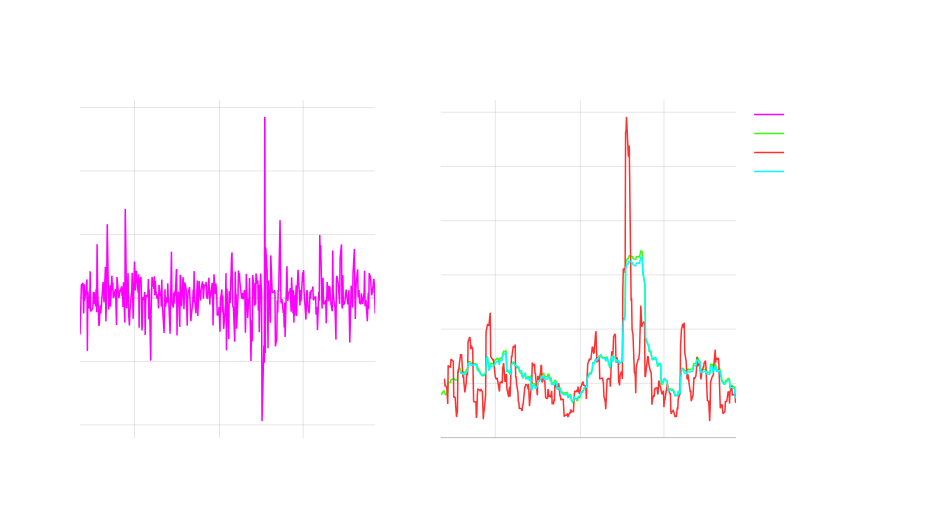

In [73]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'AAPL Returns',
        'Volatility Measures'
    ),
    horizontal_spacing=0.1
)

# plot returns
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['log_returns'],
        mode='lines',
        name='Returns',
        line=dict(color='#FF00FF', width=1.5),  # Neon pink
        showlegend=True
    ),
    row=1, col=1
)

# plot volatility
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data['ib_realized_vol_30d'],
        mode='lines',
        name='30-day Realized Vol',
        line=dict(color='#39FF14', width=1.5),  # Neon green
        showlegend=True
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=np.sqrt(data['sq_dev_7d'].rolling(7).mean()),
        mode='lines',
        name='7-day Rolling Vol',
        line=dict(color='#FF3131', width=1.5),  # Neon red
        showlegend=True
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=np.sqrt(data['sq_dev_30d'].rolling(30).mean()),
        mode='lines',
        name='30-day Rolling Vol',
        line=dict(color='#00FFFF', width=1.5),  # Neon cyan
        showlegend=True
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
for col in [1,2]:
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Date",
        row=1, col=col
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Returns" if col==1 else "Volatility",
        row=1, col=col
    )

fig.show()